<a href="https://colab.research.google.com/github/Nati274/NatiGitHub/blob/master/Copia_de_Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

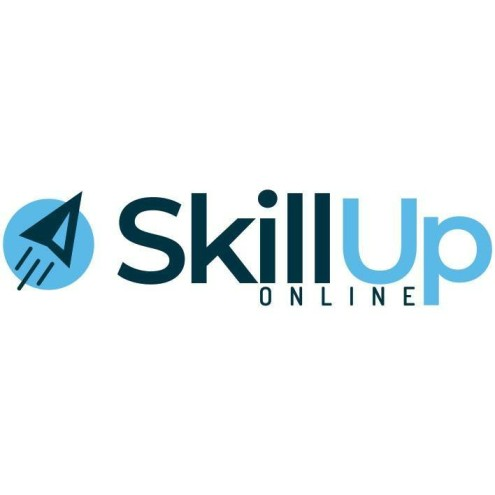

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [ ]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [1]:
# Organizar los datos en un dataframe
import pandas as pd
import numpy as np

# Paso 1: Importar el dataset
df = pd.read_csv('creditcard.csv')

# Paso 2: Explorar el dataset
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nDescripción estadística del dataset:")
print(df.describe())

print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())

# Paso 3: Organizar y limpiar los datos
# Aquí se podrían incluir pasos adicionales dependiendo del dataset
# Ejemplo: eliminar filas con valores nulos
df = df.dropna()

# Ejemplo: convertir columnas a tipos adecuados
# df['columna'] = df['columna'].astype('tipo_de_dato')

# Ejemplo: normalizar o escalar características si es necesario
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['característica1', 'característica2']] = scaler.fit_transform(df[['característica1', 'característica2']])

print("\nDataset después de limpieza:")
print(df.head())

Primeras filas del dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [3]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Identificar valores perdidos
print("Número de valores perdidos por columna:")
print(df.isnull().sum())

# Imputar valores perdidos con la media para columnas numéricas
for columna in df.select_dtypes(include=[np.number]).columns:
    df[columna] = df[columna].fillna(df[columna].mean())

# Imputar valores perdidos con la moda para columnas categóricas
for columna in df.select_dtypes(include=[object]).columns:
    moda = df[columna].mode()[0]
    df[columna] = df[columna].fillna(moda)

# Verificar si aún quedan valores perdidos
print("\nNúmero de valores perdidos por columna después de limpieza:")
print(df.isnull().sum())


Número de valores perdidos por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Número de valores perdidos por columna después de limpieza:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [5]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Identificar filas duplicadas
duplicados = df.duplicated()
print("Número de filas duplicadas:")
print(duplicados.sum())
print("\nFilas duplicadas:")
print(df[duplicados])

# Eliminar filas duplicadas, manteniendo la primera ocurrencia
df_cleaned = df.drop_duplicates()

# Verificar si aún quedan filas duplicadas
duplicados_restantes = df_cleaned.duplicated()
print("\nNúmero de filas duplicadas después de limpieza:")
print(duplicados_restantes.sum())


Número de filas duplicadas:
644

Filas duplicadas:
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
170004  119968.0 -0.130796  0.896565 -0.099684  1.138297  3.353437  1.675036   
171582  120707.0 -1.929280  0.179190 -1.524234  0.728142  1.779941 -0.738540   
171584  120707.0 -2.014251 -0.488614  0.355262  0.717058  0.597908  0.382592   
171993  120910.0  2.010962 -0.073225 -1.204314  0.436129  0.053113 -1.068571   
171995  120910.0  2.050315 -0.008197 -1.181473  0.419582  0.073203 -1

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [6]:
# Calcula el porcentaje de transacciones fraudulentas

# Muestra el porcentaje de transacciones fraudulentas

import pandas as pd

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Supongamos que la columna que indica si una transacción es fraudulenta se llama 'Class'
# Reemplaza 'Class' con el nombre real de la columna en tu dataset
columna_fraudulenta = 'Class'

# Calcular el número total de transacciones
total_transacciones = len(df)

# Calcular el número de transacciones fraudulentas
transacciones_fraudulentas = df[df[columna_fraudulenta] == 1].shape[0]

# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraudulentas = (transacciones_fraudulentas / total_transacciones) * 100

# Mostrar el resultado
print(f"Porcentaje de transacciones fraudulentas: {porcentaje_fraudulentas:.2f}%")

Porcentaje de transacciones fraudulentas: 0.19%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [8]:
# Calcula el importe medio de las transacciones fraudulentas
# Muestra el importe medio de las transacciones fraudulentas

import pandas as pd

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Definir las columnas
columna_fraudulenta = 'Class'
columna_importe = 'Amount'

# Filtrar el DataFrame para obtener solo las transacciones fraudulentas
transacciones_fraudulentas = df[df[columna_fraudulenta] == 1]

# Calcular el importe medio de las transacciones fraudulentas
importe_medio_fraudulentas = transacciones_fraudulentas[columna_importe].mean()

# Mostrar el resultado
print(f"Importe medio de las transacciones fraudulentas: ${importe_medio_fraudulentas:.2f}")

Importe medio de las transacciones fraudulentas: $122.21


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

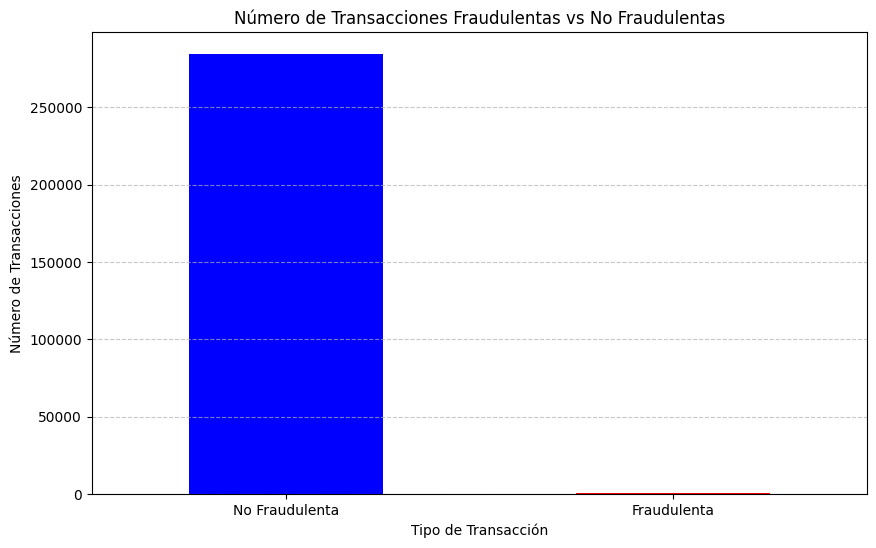

In [9]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Supongamos que la columna que indica si una transacción es fraudulenta se llama 'Class'
columna_fraudulenta = 'Class'

# Contar el número de transacciones fraudulentas y no fraudulentas
conteo_transacciones = df[columna_fraudulenta].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_transacciones.plot(kind='bar', color=['blue', 'red'])
plt.title('Número de Transacciones Fraudulentas vs No Fraudulentas')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Número de Transacciones')
plt.xticks(ticks=[0, 1], labels=['No Fraudulenta', 'Fraudulenta'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


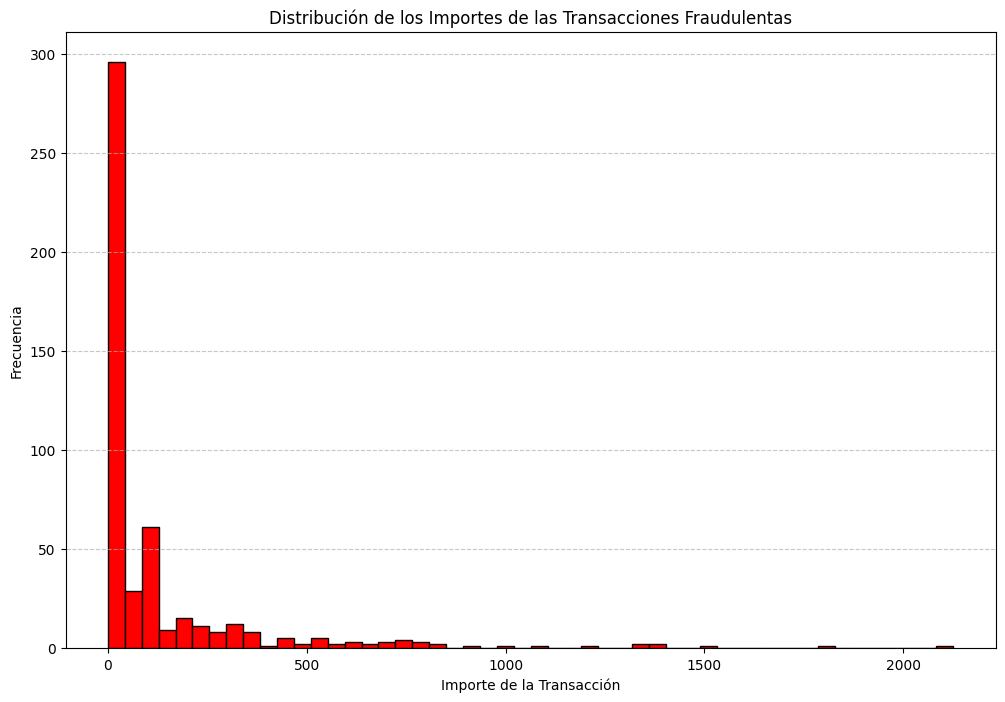

In [10]:
# Separa los datos de transacciones fraudulentas
# Muestra la distribución de los importes de las transacciones fraudulentas

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Supongamos que la columna que indica si una transacción es fraudulenta se llama 'Class'
# Y la columna que contiene el importe de la transacción se llama 'Amount'
columna_fraudulenta = 'Class'
columna_importe = 'Amount'

# Filtrar el DataFrame para obtener solo las transacciones fraudulentas
transacciones_fraudulentas = df[df[columna_fraudulenta] == 1]

# Crear un histograma de los importes de las transacciones fraudulentas
plt.figure(figsize=(12, 8))
plt.hist(transacciones_fraudulentas[columna_importe], bins=50, color='red', edgecolor='black')
plt.title('Distribución de los Importes de las Transacciones Fraudulentas')
plt.xlabel('Importe de la Transacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [11]:
# Separa los datos de entrenamiento y evaluación

import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Definir la columna objetivo y las características
columna_fraudulenta = 'Class'
X = df.drop(columns=[columna_fraudulenta])  # Características
y = df[columna_fraudulenta]  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de evaluación: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 199364 muestras
Tamaño del conjunto de evaluación: 85443 muestras


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [15]:
# IMPORTAR LAS BIBLIOTECAS NECESARIAS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#CARGAR Y PREPARAR LOS DATOS
# Cargar el dataset
df = pd.read_csv('creditcard.csv')

# Definir la columna objetivo y las características
columna_fraudulenta = 'Class'
X = df.drop(columns=[columna_fraudulenta])  # Características
y = df[columna_fraudulenta]  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#CREAR Y ENTRENAR LOS DATOS
#1. Regresión Logística
# Crear el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000)
# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

#2. Árbol de Decisión
# Crear el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

#3. Bosque Aleatorio
# Crear el modelo de bosque aleatorio
modelo_bosque = RandomForestClassifier()
# Entrenar el modelo
modelo_bosque.fit(X_train, y_train)

#4. Máquina de Soporte Vectorial
# Crear el modelo de máquina de soporte vectorial
modelo_svm = SVC()
# Entrenar el modelo
modelo_svm.fit(X_train, y_train)


#EVALUAR EL RENDIMIENTO DE LOS MODELOS

# Definir una función para evaluar los modelos
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"Matriz de Confusión:\n{confusion_matrix(y_test, y_pred)}")
    print(f"\nReporte de Clasificación:\n{classification_report(y_test, y_pred)}")
    print(f"Exactitud: {accuracy_score(y_test, y_pred):.4f}\n")

print("Evaluación del Modelo de Regresión Logística:")
evaluar_modelo(modelo_logistico, X_test, y_test)

print("Evaluación del Modelo de Árbol de Decisión:")
evaluar_modelo(modelo_arbol, X_test, y_test)

print("Evaluación del Modelo de Bosque Aleatorio:")
evaluar_modelo(modelo_bosque, X_test, y_test)

print("Evaluación del Modelo de Máquina de Soporte Vectorial:")
evaluar_modelo(modelo_svm, X_test, y_test)


Evaluación del Modelo de Regresión Logística:
Matriz de Confusión:
[[85283    24]
 [   50    86]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Exactitud: 0.9991

Evaluación del Modelo de Árbol de Decisión:
Matriz de Confusión:
[[85259    48]
 [   33   103]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.68      0.76      0.72       136

    accuracy                           1.00     85443
   macro avg       0.84      0.88      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Exactitud: 0.9991

Evaluación del Modelo de Bosque Aleatorio:
Matriz de Confusi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>